In [1]:
from bs4 import BeautifulSoup as bs
import requests

url = 'https://my.gwu.edu/mod/pws/courses.cfm?campId=1&termId=201901&subjId=DNSC'

r = requests.get(url)
data = r.text    
soup = bs(data, "html.parser")
# print(soup)

In [2]:
allRows = soup.findAll('tr',{'align':'center'})
#allRows = soup.findAll('tr',{'class' : 'tableRow1Font'}) # why not this

tableData = []
for row in allRows:
    eachRow = []
    cells = row.findAll('td')
    for cell in cells:
        eachRow.append(str(cell.text.strip()))
    tableData.append(eachRow)


In [3]:
tableData

[['STATUS',
  'CRN',
  'SUBJECT',
  'SECT',
  'COURSE',
  'CREDIT',
  'INSTR.',
  'BLDG/RM',
  'DAY/TIME',
  'FROM / TO',
  ''],
 ['OPEN',
  '47771',
  'DNSC\n\t\t\t\n\n\n\t\t\t\t\t1001',
  '10',
  'Business Analytics I: Statistics for Descriptive and Predictive Analytics',
  '3.00',
  '',
  'TOMP 301',
  'TR11:10AM - 12:25PM',
  '01/14/19 - 04/29/19',
  ''],
 ['OPEN',
  '47772',
  'DNSC\n\t\t\t\n\n\n\t\t\t\t\t2001',
  '10',
  'Business Analytics II: Predictive and Prescriptive Analytics',
  '3.00',
  'Prasad, S',
  'FNGR 223',
  'T12:45PM - 03:15PM',
  '01/14/19 - 04/29/19',
  ''],
 ['OPEN',
  '47773',
  'DNSC\n\t\t\t\n\n\n\t\t\t\t\t3403',
  '10',
  'Decision Models',
  '3.00',
  'Jarrah, A',
  'ROME 205',
  'TR02:20PM - 03:35PM',
  '01/14/19 - 04/29/19',
  ''],
 ['OPEN',
  '47774',
  'DNSC\n\t\t\t\n\n\n\t\t\t\t\t4279',
  '10',
  'Data Mining',
  '3.00',
  'Prasad, S',
  'COR 204',
  'M12:45PM - 03:15PM',
  '01/14/19 - 04/29/19',
  ''],
 ['OPEN',
  '47775',
  'DNSC\n\t\t\t\n\n\n\t\t\t

In [4]:
tableData[0]

['STATUS',
 'CRN',
 'SUBJECT',
 'SECT',
 'COURSE',
 'CREDIT',
 'INSTR.',
 'BLDG/RM',
 'DAY/TIME',
 'FROM / TO',
 '']

In [5]:
tableData[0:2]

[['STATUS',
  'CRN',
  'SUBJECT',
  'SECT',
  'COURSE',
  'CREDIT',
  'INSTR.',
  'BLDG/RM',
  'DAY/TIME',
  'FROM / TO',
  ''],
 ['OPEN',
  '47771',
  'DNSC\n\t\t\t\n\n\n\t\t\t\t\t1001',
  '10',
  'Business Analytics I: Statistics for Descriptive and Predictive Analytics',
  '3.00',
  '',
  'TOMP 301',
  'TR11:10AM - 12:25PM',
  '01/14/19 - 04/29/19',
  '']]

In [6]:
labels = tableData.pop(0) # keep for later use

In [7]:
labels

['STATUS',
 'CRN',
 'SUBJECT',
 'SECT',
 'COURSE',
 'CREDIT',
 'INSTR.',
 'BLDG/RM',
 'DAY/TIME',
 'FROM / TO',
 '']

In [8]:
import pandas as pd
df = pd.DataFrame.from_records(tableData, columns=labels)
df.head()

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,
0,OPEN,47771,DNSC\n\t\t\t\n\n\n\t\t\t\t\t1001,10,Business Analytics I: Statistics for Descripti...,3.00,,TOMP 301,TR11:10AM - 12:25PM,01/14/19 - 04/29/19,
1,OPEN,47772,DNSC\n\t\t\t\n\n\n\t\t\t\t\t2001,10,Business Analytics II: Predictive and Prescrip...,3.00,"Prasad, S",FNGR 223,T12:45PM - 03:15PM,01/14/19 - 04/29/19,
2,OPEN,47773,DNSC\n\t\t\t\n\n\n\t\t\t\t\t3403,10,Decision Models,3.00,"Jarrah, A",ROME 205,TR02:20PM - 03:35PM,01/14/19 - 04/29/19,
3,OPEN,47774,DNSC\n\t\t\t\n\n\n\t\t\t\t\t4279,10,Data Mining,3.00,"Prasad, S",COR 204,M12:45PM - 03:15PM,01/14/19 - 04/29/19,
4,OPEN,47775,DNSC\n\t\t\t\n\n\n\t\t\t\t\t4900,10,Supply Chain Management,3.00,"Matta, M",DUQUES 652,R12:45PM - 03:15PM,01/14/19 - 04/29/19,


In [9]:
df['SUBJECT'] = df['SUBJECT'].str.replace("\n","")
df.head()

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,
0,OPEN,47771,DNSC\t\t\t\t\t\t\t\t1001,10,Business Analytics I: Statistics for Descripti...,3.00,,TOMP 301,TR11:10AM - 12:25PM,01/14/19 - 04/29/19,
1,OPEN,47772,DNSC\t\t\t\t\t\t\t\t2001,10,Business Analytics II: Predictive and Prescrip...,3.00,"Prasad, S",FNGR 223,T12:45PM - 03:15PM,01/14/19 - 04/29/19,
2,OPEN,47773,DNSC\t\t\t\t\t\t\t\t3403,10,Decision Models,3.00,"Jarrah, A",ROME 205,TR02:20PM - 03:35PM,01/14/19 - 04/29/19,
3,OPEN,47774,DNSC\t\t\t\t\t\t\t\t4279,10,Data Mining,3.00,"Prasad, S",COR 204,M12:45PM - 03:15PM,01/14/19 - 04/29/19,
4,OPEN,47775,DNSC\t\t\t\t\t\t\t\t4900,10,Supply Chain Management,3.00,"Matta, M",DUQUES 652,R12:45PM - 03:15PM,01/14/19 - 04/29/19,


In [10]:
df['SUBJECT'] = df['SUBJECT'].str.replace("\t","")
df.head()

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,
0,OPEN,47771,DNSC1001,10,Business Analytics I: Statistics for Descripti...,3.00,,TOMP 301,TR11:10AM - 12:25PM,01/14/19 - 04/29/19,
1,OPEN,47772,DNSC2001,10,Business Analytics II: Predictive and Prescrip...,3.00,"Prasad, S",FNGR 223,T12:45PM - 03:15PM,01/14/19 - 04/29/19,
2,OPEN,47773,DNSC3403,10,Decision Models,3.00,"Jarrah, A",ROME 205,TR02:20PM - 03:35PM,01/14/19 - 04/29/19,
3,OPEN,47774,DNSC4279,10,Data Mining,3.00,"Prasad, S",COR 204,M12:45PM - 03:15PM,01/14/19 - 04/29/19,
4,OPEN,47775,DNSC4900,10,Supply Chain Management,3.00,"Matta, M",DUQUES 652,R12:45PM - 03:15PM,01/14/19 - 04/29/19,


In [11]:
df.to_csv('courses.csv',columns=labels,index=False,sep=',')

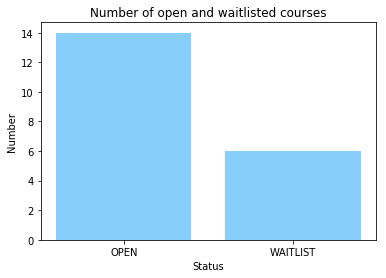

In [13]:
import matplotlib.pyplot as plt
status = list(df['STATUS'].unique())
values = list(df['STATUS'].value_counts())
plt.bar(status, values, color="#87CEFA")
plt.xlabel('Status')
plt.ylabel('Number')
plt.title('Number of open and waitlisted courses')
plt.show()